## Airport Delays - Challenge 
### Derek Wales MIDS 21

#### Deliverables:
##### Better understand the challenges or insights from the raw data (EDA)
##### A Model that predicts whether or not a departing flight will be delayed
##### Summary of insights and recommendations 
##### List way ahead for the Data Science Team

In [1]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Data analysis
import pandas as pd
import numpy as np

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
weather_df = pd.read_csv('weather.csv')
weather_df.head(3)

,Unnamed: 0,airport,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,1,Highland,2019-11-30 00:00:00,Overcast,0.0000,0.00,37.30,32.11,32.47,0.82,...,6.70,8.06,141.090120,1.00,0,10.0,309.69,NaN,NaN,2019-11-30 00:00:00
1,2,Highland,2019-11-30 01:00:00,Possible Drizzle,0.0018,0.35,37.74,33.16,32.10,0.80,...,5.77,7.58,110.003815,0.95,0,10.0,309.09,rain,NaN,2019-11-30 01:00:00
2,3,Highland,2019-11-30 02:00:00,Possible Drizzle,0.0062,0.54,37.60,31.13,32.41,0.83,...,8.04,8.57,112.053620,1.00,0,10.0,308.70,rain,NaN,2019-11-30 02:00:00


In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1536 non-null   int64  
 1   airport              1536 non-null   object 
 2   time                 1536 non-null   object 
 3   summary              1536 non-null   object 
 4   precipIntensity      1536 non-null   float64
 5   precipProbability    1536 non-null   float64
 6   temperature          1536 non-null   float64
 7   apparentTemperature  1536 non-null   float64
 8   dewPoint             1536 non-null   float64
 9   humidity             1536 non-null   float64
 10  pressure             1536 non-null   float64
 11  windSpeed            1536 non-null   float64
 12  windGust             1536 non-null   float64
 13  windBearing          1536 non-null   float64
 14  cloudCover           1536 non-null   float64
 15  uvIndex              1536 non-null   i

In [6]:
weather_df.describe()

,Unnamed: 0,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipAccumulation
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,81.000000
mean,768.500000,0.003304,0.117331,35.510918,29.115749,25.139629,0.675007,1016.511283,9.527930,11.326413,228.107328,0.598086,0.210938,9.083046,333.793210,0.044423
std,443.549321,0.012533,0.303385,9.452021,12.087124,12.464821,0.155994,10.804320,4.448901,6.424565,82.520152,0.372036,0.420684,2.194884,30.406867,0.062452
min,1.000000,0.000000,0.000000,11.530000,-2.150000,-13.040000,0.220000,985.900000,0.120000,0.260000,0.007128,0.000000,0.000000,0.498000,268.570000,0.001400
25%,384.750000,0.000000,0.000000,29.850000,21.665000,17.982500,0.570000,1009.160000,6.460000,7.167500,190.030115,0.190000,0.000000,9.967750,310.827500,0.005600
50%,768.500000,0.000000,0.000000,35.150000,28.445000,25.405000,0.700000,1018.075000,9.150000,10.250000,234.514672,0.690000,0.000000,10.000000,332.660000,0.016100
75%,1152.250000,0.000000,0.000000,40.490000,35.472500,32.330000,0.800000,1024.320000,12.100000,13.810000,291.075677,0.980000,0.000000,10.000000,353.605000,0.060000
max,1536.000000,0.129200,1.000000,62.120000,62.140000,55.840000,1.000000,1040.360000,24.770000,36.970000,359.077229,1.000000,2.000000,10.000000,423.560000,0.356200


In [7]:
# Creating an expected rain column
weather_df['expected_rain'] = weather_df['precipIntensity'] * weather_df['precipProbability']

In [8]:
flights_df = pd.read_csv('Flight_on_time_HIX.csv')
flights_df.head(3)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,2019-12-01,IYF,HIX,678.0,1,103.0,62.0,15.0,118.0,127,219.0,52.0,7.0,212.0,LateAircraft
1,TR,3776,GDISCI,2019-12-01,HEN,HIX,1700.0,10,25.0,15.0,21.0,46.0,616,624.0,8.0,27.0,557.0,NaN
2,RO,4754,GHHWLL,2019-12-01,HIX,IZN,413.0,10,10.0,0.0,15.0,25.0,242,227.0,0.0,5.0,222.0,NaN


In [9]:
# Replacing NaN with on time
flights_df['Delay_Reason'].fillna('on_time', inplace=True)
flights_df['Delay_Reason'].unique()

array(['LateAircraft', 'on_time', 'Weather', 'Carrier', 'NAS', 'Security'],
      dtype=object)

In [11]:
# flights_df.columns

In [12]:
# Flights delayed
delayed_flights = flights_df[flights_df['Delay_Reason'] != 'on_time']
delayed_flights.shape

(14081, 18)

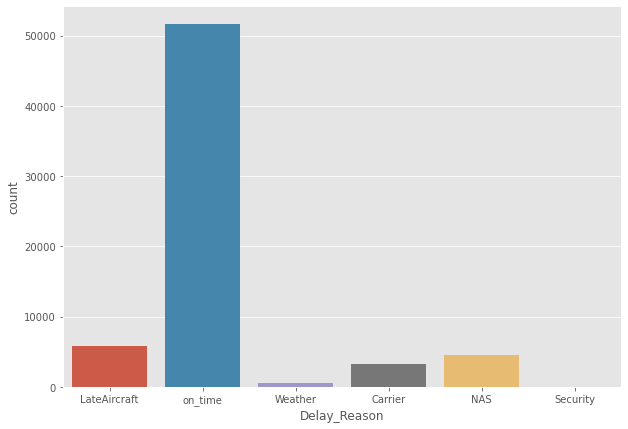

In [13]:
# Viewing on time vs types of delay
plt.figure(figsize = (10,7))
ax = sns.countplot(x="Delay_Reason", data=flights_df)

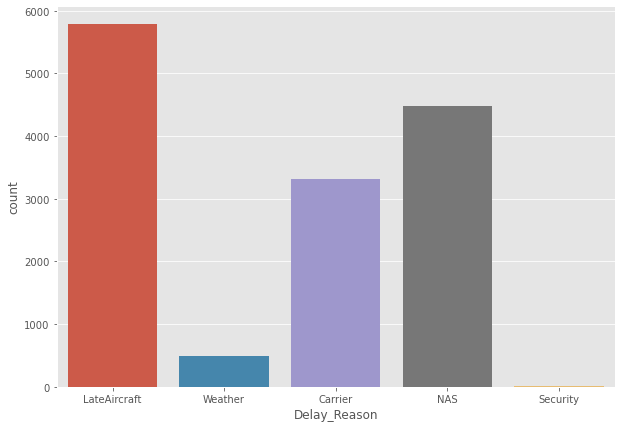

In [14]:
# Plotting the delayed flights
plt.figure(figsize = (10,7))
ax = sns.countplot(x="Delay_Reason", data=delayed_flights)

In [15]:
delayed_flights.Delay_Reason.value_counts(normalize=True)

LateAircraft    0.410482
NAS             0.318159
Carrier         0.235779
Weather         0.034941
Security        0.000639
Name: Delay_Reason, dtype: float64

In [16]:
# Digging down into the late aircraft 
delayed_flights_late_ac = delayed_flights[delayed_flights['Delay_Reason'] == 'LateAircraft']  

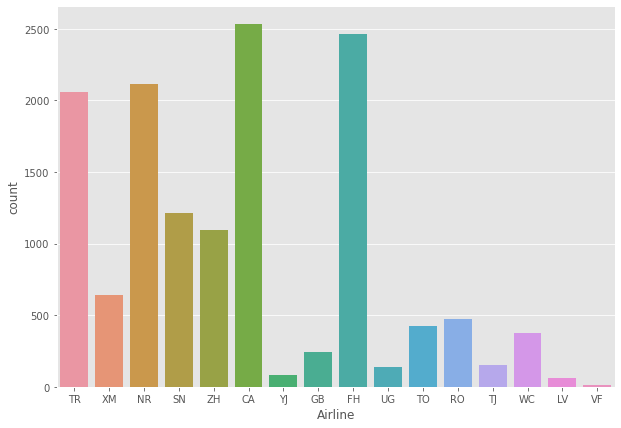

In [17]:
# Checking which providers cause the most 
plt.figure(figsize = (10,7))
ax = sns.countplot(x="Airline",  data=delayed_flights)

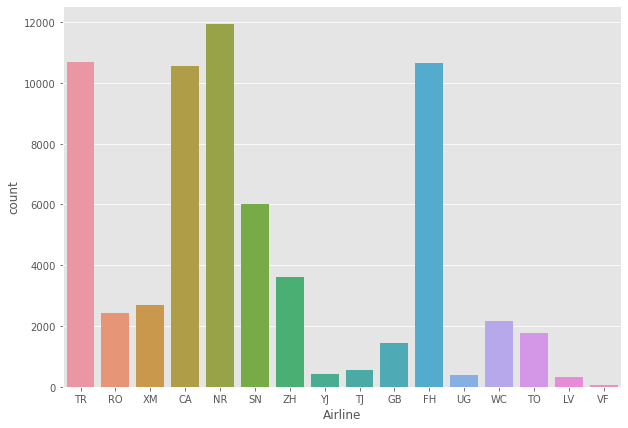

In [18]:
# Count of all fights by airline - This does not suggest that it isan airline specific problem
plt.figure(figsize = (10,7))
ax = sns.countplot(x="Airline",  data=flights_df)

In [19]:
# Creating a day of the week column
flights_df['FlightDate'] = pd.to_datetime(flights_df['FlightDate'])
flights_df['day_of_week'] = flights_df['FlightDate'].dt.day_name()

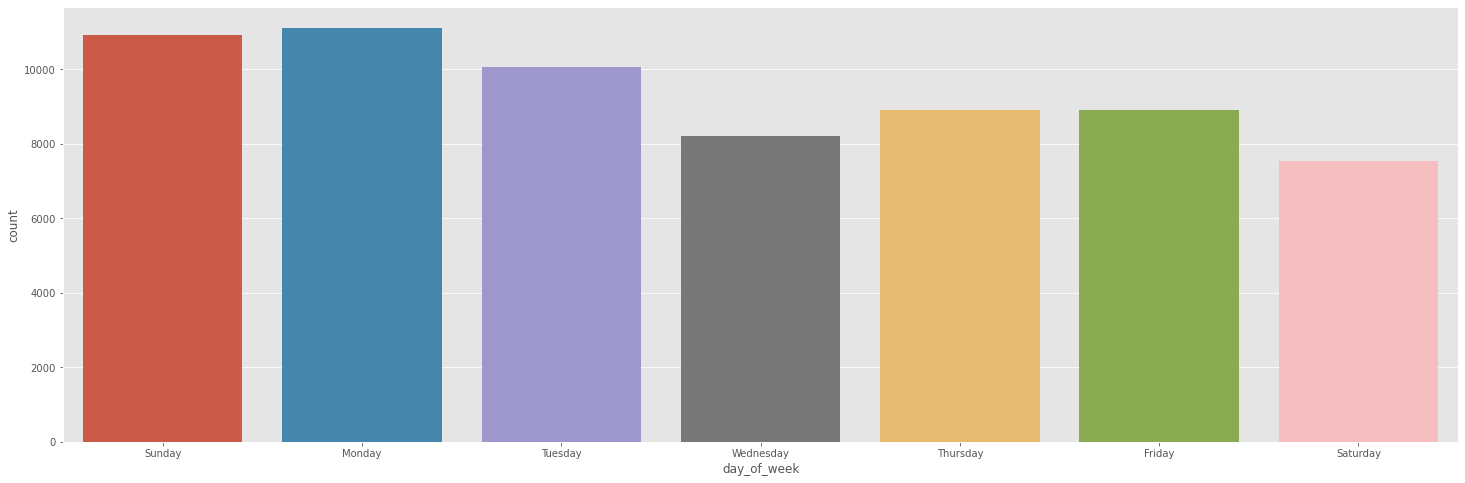

In [20]:
# Plotting the flights by day of the week
plt.figure(figsize = (25,8))
ax = sns.countplot(x="day_of_week",  data=flights_df)

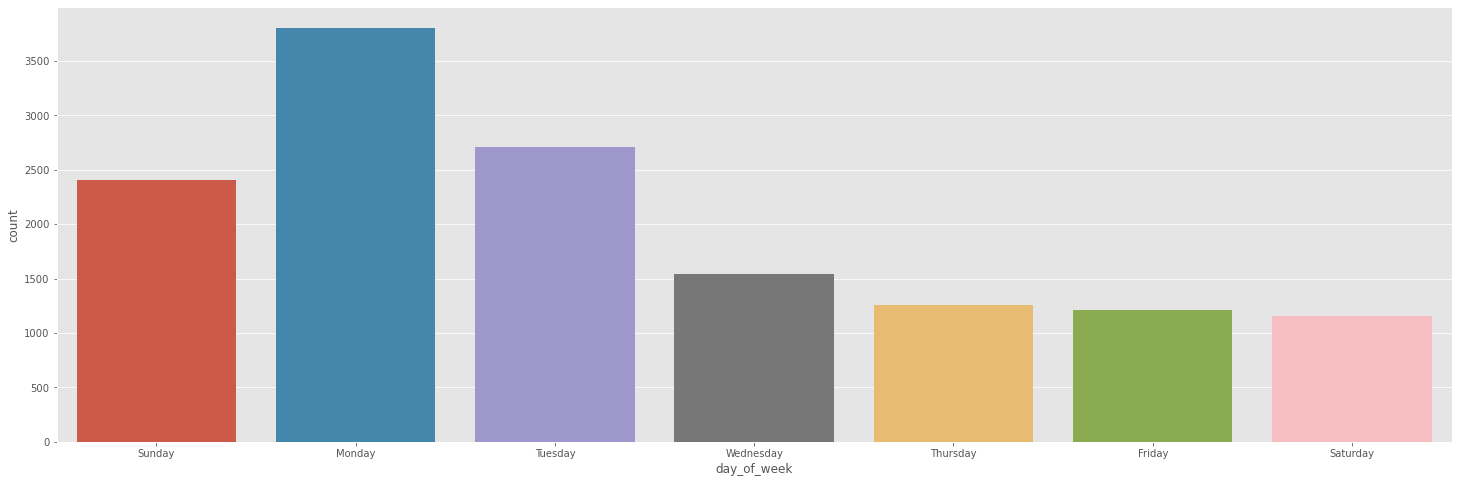

In [21]:
# Creating a day of the week column
delayed_flights['FlightDate'] = pd.to_datetime(delayed_flights['FlightDate'])
delayed_flights['day_of_week'] = delayed_flights['FlightDate'].dt.day_name()

# Plotting the delayed flights by day of the week
plt.figure(figsize = (25,8))
ax = sns.countplot(x="day_of_week",  data=delayed_flights)

## Note:
### NAS Delays are national aviation systems delays are cause by an number of factors based on the site below
### https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?type=5&pn=1

In [22]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65669 entries, 0 to 65668
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   65669 non-null  object        
 1   Flight_Number             65669 non-null  int64         
 2   Plane_ID                  65669 non-null  object        
 3   FlightDate                65669 non-null  datetime64[ns]
 4   Origin_Airport            65669 non-null  object        
 5   Destination_Airport       65669 non-null  object        
 6   Flight_Distance           65669 non-null  float64       
 7   Scheduled_Departure_Time  65669 non-null  int64         
 8   Actual_Departure_Time     65669 non-null  float64       
 9   Departure_Delay_Minutes   65669 non-null  float64       
 10  Departure_Taxi            65669 non-null  float64       
 11  Departure_WheelsOff       65669 non-null  float64       
 12  Scheduled_Arrival_

In [23]:
# Checking if specific planes are part of the problem
delayed_flights.Plane_ID.value_counts()

GFDTTX    72
GFHSTX    66
GFGVTX    61
GFHQTX    59
GFGTTX    56
          ..
GDHQAP     1
GGMVWD     1
GHHNHK     1
GJKWED     1
GJJTQZ     1
Name: Plane_ID, Length: 2144, dtype: int64

In [24]:
# Checking the balance of destination and orgin airports
print("Number of samples", flights_df.shape[0])
print("Number of origin airports", len(flights_df.Origin_Airport.unique()))
print("Number of desination airports", len(flights_df.Destination_Airport.unique()))

Number of samples 65669
Number of origin airports 170
Number of desination airports 169


In [25]:
flights_df['Delay_Reason'].value_counts()

on_time         51588
LateAircraft     5780
NAS              4480
Carrier          3320
Weather           492
Security            9
Name: Delay_Reason, dtype: int64

In [26]:
# Validating the correct number of entries
flights_df['delayed'] = np.where(flights_df['Delay_Reason']!='on_time', 1, 0)
flights_df['delayed'].value_counts()

0    51588
1    14081
Name: delayed, dtype: int64

In [27]:
# Converting the key column to time 
weather_df['time'] = pd.to_datetime(weather_df['time'])

# Keeping on the highland airport
weather_df = weather_df[weather_df['airport'] == 'Highland']

In [28]:
# weather_df.columns
flights_df['FlightDate'] = pd.to_datetime(flights_df['FlightDate'])

In [29]:
new_df = pd.merge(flights_df, weather_df, left_on='FlightDate', right_on='time', how='left')
new_df.shape

(65669, 42)

In [54]:
# Adding an ROC Function

def plot_roc(labels, prediction_scores):
    '''
    Creates a plot of the Recieving Opering Characteristics (ROC) Curve
    using the labels and predictions generated by the classifier.
    AOC is the Area under the curve.
    '''
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.figure(figsize = (12,8))
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC for Model Performance')

## Model Building

In [30]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Random Forest

In [83]:
# Getting X and y
X = new_df[['Airline', 'Origin_Airport', 'Destination_Airport', 'Flight_Distance', 'Scheduled_Departure_Time', 'day_of_week', 
                'Departure_Taxi', 'Arrival_Taxi', 'apparentTemperature', 'visibility', 'windSpeed', 'summary', 'uvIndex']]
y = new_df['delayed']

X_dummies= pd.get_dummies(X, prefix=['Airline', 'Origin_Airport', 'Destination_Airport', 'summary', 'day_of_week'])

In [84]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=101)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

# Fitting and Predicting 
rand_forest.fit(X_train, y_train)
pred = rand_forest.predict(X_test)

In [86]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))

Confusion Matrix:
[[14901   538]
 [ 2710  1552]]


In [87]:
print('Classification Report:')
print(classification_report(y_test,pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90     15439
           1       0.74      0.36      0.49      4262

    accuracy                           0.84     19701
   macro avg       0.79      0.66      0.70     19701
weighted avg       0.82      0.84      0.81     19701



In [64]:
rand_forest.decision_path(X_test)

(<19701x2327832 sparse matrix of type '<class 'numpy.int64'>'
 	with 85082798 stored elements in Compressed Sparse Row format>,
 array([      0,   22741,   46032,   68747,   92052,  115539,  138752,
         162265,  185372,  208631,  232194,  255861,  279302,  302799,
         326014,  349929,  373446,  396341,  419358,  442331,  465506,
         488997,  512184,  535137,  558264,  581523,  604906,  628233,
         651522,  674853,  698082,  720731,  744350,  767625,  791172,
         813911,  837082,  860267,  883404,  906875,  930714,  954061,
         977508, 1000697, 1023716, 1046989, 1070362, 1094003, 1117182,
        1140671, 1164496, 1187991, 1211620, 1234989, 1257934, 1281207,
        1304796, 1328033, 1351014, 1374763, 1398074, 1421121, 1444638,
        1468163, 1492140, 1514973, 1538330, 1561021, 1583978, 1606813,
        1630098, 1653589, 1676596, 1699835, 1723560, 1746559, 1770082,
        1793391, 1816438, 1839467, 1862842, 1885719, 1908776, 1931869,
        1954926, 197

### Logistic Regression

In [65]:
# importing logistic regression 
from sklearn.linear_model import LogisticRegression

# Instatiating 
logReg = LogisticRegression()

# Fitting the model
logReg.fit(X_train, y_train)

LogisticRegression()

In [66]:
# Predicting and Making a classification report
predictions = logReg.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Confusion Matrix:
[[15039   400]
 [ 3210  1052]]


In [68]:
print(accuracy_score(y_test, predictions))

0.8167605705294148



The grey line represents a random guess.


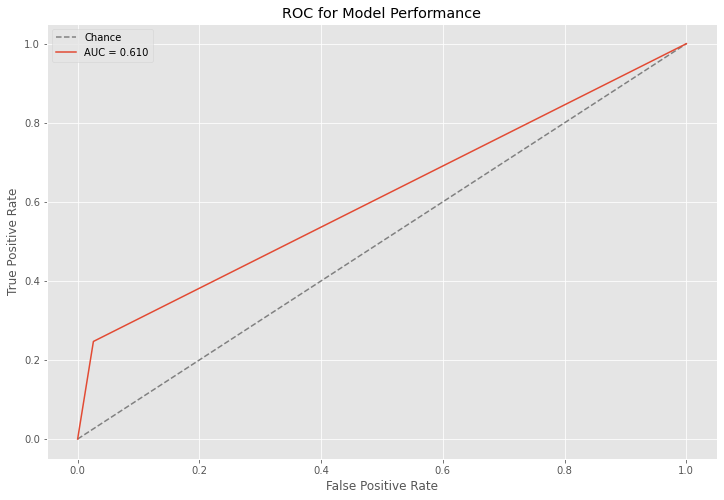

In [69]:
# ROC Plot
print("\nThe grey line represents a random guess.")
plot_roc(y_test,predictions)

### SVM Attempt

In [78]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [79]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print('\n')
print("Accuracy Score:")
print(accuracy_score(y_test, pred))

Confusion Matrix:
[[15439     0]
 [ 4262     0]]


Accuracy Score:
0.7836658037663062


### Neural Network

In [70]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [71]:
# Normalizing the average monthly hours
ss = StandardScaler()

X_dummies = ss.fit_transform(X_dummies)

In [72]:
X_dummies.shape

(65669, 378)

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(40, input_shape=(378,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3) 

Epoch 1/10
1006/1006 [==============================] - 3s 3ms/step - loss: 0.5411 - accuracy: 0.7848 - val_loss: 0.5216 - val_accuracy: 0.7847
Epoch 2/10
1006/1006 [==============================] - 2s 2ms/step - loss: 0.5185 - accuracy: 0.7871 - val_loss: 0.5223 - val_accuracy: 0.7847
Epoch 3/10
1006/1006 [==============================] - 3s 3ms/step - loss: 0.5186 - accuracy: 0.7871 - val_loss: 0.5226 - val_accuracy: 0.7847
Epoch 4/10
1006/1006 [==============================] - 3s 3ms/step - loss: 0.5187 - accuracy: 0.7871 - val_loss: 0.5210 - val_accuracy: 0.7847
Epoch 5/10
1006/1006 [==============================] - 2s 2ms/step - loss: 0.5186 - accuracy: 0.7871 - val_loss: 0.5212 - val_accuracy: 0.7847
Epoch 6/10
1006/1006 [==============================] - 2s 2ms/step - loss: 0.5186 - accuracy: 0.7871 - val_loss: 0.5210 - val_accuracy: 0.7847
Epoch 7/10
1006/1006 [==============================] - 3s 3ms/step - loss: 0.5189 - accuracy: 0.7871 - val_loss: 0.5214 - val_accuracy:

In [76]:
y_pred = model.predict_classes(X_test) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [77]:
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))



Confusion Matrix:
[[15439     0]
 [ 4262     0]]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15439
           1       0.00      0.00      0.00      4262

    accuracy                           0.78     19701
   macro avg       0.39      0.50      0.44     19701
weighted avg       0.61      0.78      0.69     19701



In [79]:
print(accuracy_score(y_test, y_pred))

0.7836658037663062



The grey line represents a random guess.


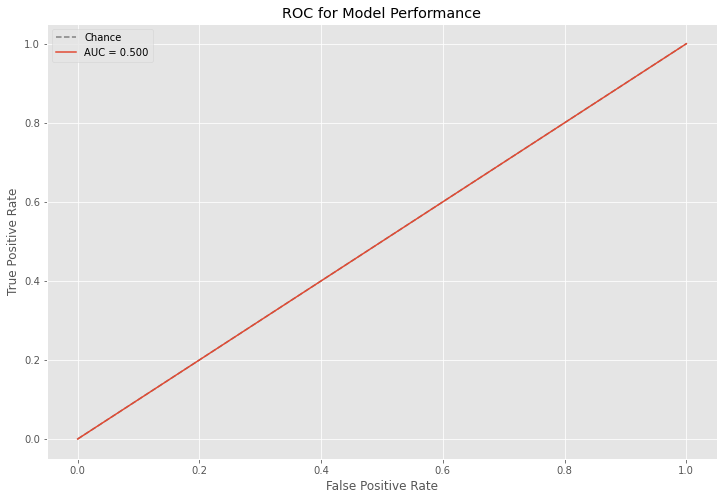

In [82]:
# ROC Plot
print("\nThe grey line represents a random guess.")
plot_roc(y_test,y_pred)